In [185]:
from google.colab import files
uploaded = files.upload()

Saving extraction_v2.csv to extraction_v2 (1).csv


In [186]:
import io
import pandas as pd
!pip install nltk
!pip install pyspellchecker
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
from spellchecker import SpellChecker
from tqdm import tqdm
data_processed = pd.read_csv(io.BytesIO(uploaded['extraction_v2.csv']),encoding="latin1")
data_processed

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,content
0,New charge likely against Theranos founder Eli...
1,"Employers submitting false UIF claims, warns c..."
2,Lori Loughlin confident her college admissions...
3,fraud related to small business 17 Rikers offi...
4,Elon Musk Wipes Nearly $15 Billion Off Teslaâ...
...,...
492,Coronavirus: CloseExperts have said that inter...
493,Coronavirus: CloseExperts have said that inter...
494,A Mokena family just wanted a puppy during the...
495,A Mokena family just wanted a puppy during the...


In [189]:
data_processed.columns
final = pd.DataFrame()
final['Content'] = data_processed['content']
final.head()

 

,Content
0,New charge likely against Theranos founder Eli...
1,"Employers submitting false UIF claims, warns c..."
2,Lori Loughlin confident her college admissions...
3,fraud related to small business 17 Rikers offi...
4,Elon Musk Wipes Nearly $15 Billion Off Teslaâ...


In [190]:
data=final.drop_duplicates(keep='first', inplace=False)
data.shape

(404, 1)

In [191]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [192]:
stopwords= set(['the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","t","eri",'y',"re",'d'])

In [194]:
# Combining all the above stundents 
!pip install nltk
!pip install pyspellchecker
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
from spellchecker import SpellChecker
from tqdm import tqdm
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer() 
spell = SpellChecker()
preprocessed_data=pd.DataFrame()

spell = SpellChecker(distance=1)
def Correct(x):
    return spell.correction(x)

def Text_preprocessing(sentance):
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    sentance = ' '.join(Correct(w) for w in sentance.split())
    sentance = ' '.join(spell.correction(w) for w in sentance.split())
    sentance = ' '.join(lemmatizer.lemmatize(w) for w in sentance.split())
    #sentance = ' '.join(ps.stem(w) for w in sentance.split())
    return sentance

data['Content']= data['Content'].apply(Text_preprocessing)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [195]:
#Deduplication of entries
data=data.drop_duplicates(keep='first', inplace=False)
#Checking to see how much % of data still remains

In [196]:
data.shape

(366, 1)

In [197]:
data["Content"][0]

'new charge likely theranos founder elizabeth holmes report articlejust week federal judge announced trial theranos founder elizabeth holmes would postponed amid novel coronavirus pandemic prosecutor filed new court paper indicating plan add charge embattled businesswoman prosecutor submitted superseding information friday expected indict holmes additional wire fraud charge reported individual cannon indicted without grand jury process meaning move would likely stalled grand jury able convene not expected least june according report meantime prosecutor filed newest wire fraud charge information serf way provide defense attorney advance notice come attorney former federal prosecutor david calloway told outlet advertisement never seen happen course practiced year without ever pandemic grand jury not sitting said holmes originally scheduled go trial summer date since pushed back least oct allege holmes former chief operating officer ramesh sunny balwani deliberately misled investor policy

In [198]:
preprocessed_data_list = []
for sentance in tqdm(data["Content"].values):
    preprocessed_data_list.append(sentance.strip())

100%|██████████| 366/366 [00:00<00:00, 101643.07it/s]


In [199]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re
!pip install sklearn 
from sklearn.model_selection import train_test_split

 


def label_sentences(corpus, label_type):
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled


In [200]:
X_train, X_test = train_test_split(data.Content, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [217]:
all_data[:10]

[TaggedDocument(words=['radio', 'parliamentthe', 'chamber', 'deputy', 'discussing', 'today', 'simple', 'motion', 'tabled', 'social', 'democrat', 'opposition', 'demand', 'resignation', 'fierrorce', 'minister', 'florin', 'c', 'u', 'argue', 'month', 'governing', 'state', 'emergency', 'no', 'measure', 'taken', 'avoid', 'economic', 'disaster', 'fierrorce', 'minister', 'unable', 'come', 'efficient', 'measure', 'support', 'business', 'environment', 'vote', 'motion', 'due', 'wednesday', 'today', 'q', 'session', 'chamber', 'deputy', 'healthcare', 'minister', 'nell', 'tatar', 'invited', 'present', 'measure', 'taken', 'fight', 'curb', 'coronavirus', 'outbreak', 'meanwhile', 'labour', 'minister', 'violeta', 'alexandra', 'foreign', 'minister', 'bogdan', 'aurescu', 'heard', 'today', 'senate', 'special', 'committee', 'respect', 'measure', 'protect', 'romanian', 'worker', 'left', 'country', 'work', 'abroad', 'government', 'pas', 'bill', 'today', 'meeting', 'concerning', 'measure', 'prevent', 'contain'

In [202]:
#Hyperparameter optimization on Doc2Vec
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

 

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 366/366 [00:00<00:00, 166679.18it/s]


In [214]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [204]:
train_vectors_dbow.shape

(256, 300)

In [205]:
train_vectors_dbow[:5]

array([[ 0.25013834, -0.66278213,  0.78228927, ..., -0.32098705,
        -0.6785388 ,  0.19991799],
       [-0.10712358, -0.11356347,  0.0152091 , ...,  0.03142258,
        -0.07047015, -0.71627283],
       [-0.04641719, -0.03328178,  0.11567879, ..., -0.1335905 ,
         0.4651283 , -0.32288182],
       [-0.10117311, -0.68141741,  0.78811723, ..., -0.17723276,
         0.32916698, -0.37166786],
       [-0.04543055, -0.4273656 ,  0.38197887, ..., -0.19037518,
        -0.02204683, -0.20353192]])

In [206]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

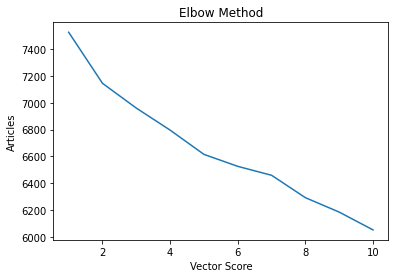

In [207]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(train_vectors_dbow)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Vector Score')
plt.ylabel('Articles')
plt.show()

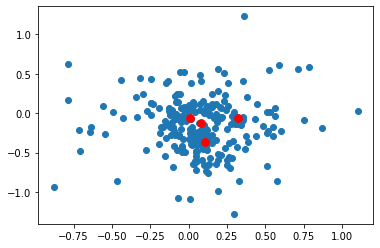

In [211]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(train_vectors_dbow)
labels = pred_y
plt.scatter(train_vectors_dbow[:,0], train_vectors_dbow[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c='red')
plt.show()

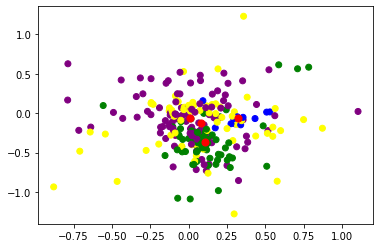

In [212]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
label1 = ['#FFFF00', '#008000', '#0000FF', '#800080']
color = [label1[i] for i in labels]
plt.scatter(train_vectors_dbow[:,0], train_vectors_dbow[:,1], c=color)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()